In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
def Sunspot_number_read_and_parsing():
    fin = open("DailyTotalSunspotNumber.txt", "r")

    data = fin.readlines()

    dates = []
    count = []

    """
    last = pd.Series(pd.date_range('1800-01-01', periods=1, freq='D'))
    tmp = pd.Series([pd.Timedelta(days=i+1) for i in range(1)])
    """
    
    for line in data:
        date = line[0:4] + '-' + line[5:7] + '-' + line[8:10]
        if date[5] == ' ':
            date = date[:5] + '0' + date[6:]
        if date[8] == ' ':
            date = date[:8] + '0' + date[9:]

        """
        cur = pd.Series(pd.date_range(date, periods=1, freq='D'))
        if (len(dates) != 0):
            while (last[0] != cur[0]):
                my_date = pd.Series.to_string(last).split()
                dates.append(my_date[1])
                count.append(-1)
                last = last + tmp
        last = cur + tmp
        """

        dates.append(date)
        count.append(int(line[21:24]))

    return (dates, count)

In [3]:
def Daily_sunspot_number_plot():
    (dates, count) = Sunspot_number_read_and_parsing()

    df_daily = pd.DataFrame({'Number (daily)': pd.Series(count, index=pd.DatetimeIndex(dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_daily.plot()
    plt.show()

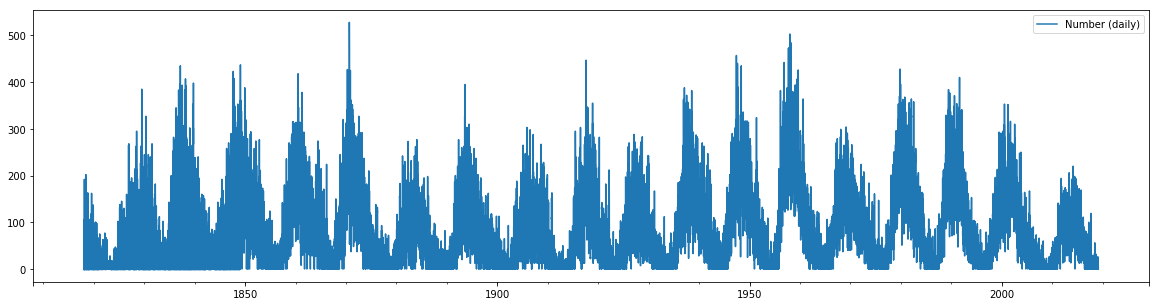

In [4]:
Daily_sunspot_number_plot()

In [5]:
def Period_sunspot_number_plot(period):
    (dates, count) = Sunspot_number_read_and_parsing()

    without_monitoring = []

    for i in range(len(count)):
        if (count[i] == -1):
            add = 1
        else:
            add = 0
        without_monitoring.append(add)

    period_count = []
    period_dates = []

    for i in range(len(count) - period + 1):
        if (sum(without_monitoring[i:i+period]) != period):
            nom_sum = sum(count[i:i+period]) + sum(without_monitoring[i:i+period])
            real_sum = math.floor(nom_sum * period / (period - sum(without_monitoring[i:i+period])))
            period_count.append(real_sum)
            period_dates.append(dates[period // 2 + i])
        else:
            print("Error: it has a period without monitoring!")
            return

    df_period = pd.DataFrame({'Number (period)': pd.Series(period_count, index=pd.DatetimeIndex(period_dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_period.plot()
    plt.show()

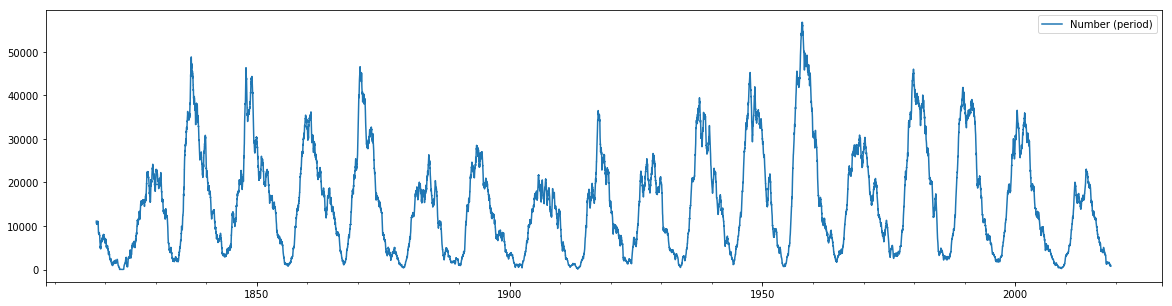

In [6]:
Period_sunspot_number_plot(182)

In [7]:
def Sunspot_area_read_and_parsing():
    fin = open("DailySunspotData.txt", "r")

    data = fin.readlines()

    dates = []
    area = []

    for line in data:
        date = line[0:4] + '-' + line[4:6] + '-' + line[6:8]
        if date[5] == ' ':
            date = date[:5] + '0' + date[6:]
        if date[8] == ' ':
            date = date[:8] + '0' + date[9:]
        dates.append(date)
        area.append(int(line[40:44]))

    res_dates = []
    res_area = []

    for i in range(len(dates)):
        if (i == 0):
            res_dates.append(dates[0])
            res_area.append(area[0])
        else:
            if (dates[i] == dates[i - 1]):
                res_area[-1] += area[i]
            else:
                res_dates.append(dates[i])
                res_area.append(area[i])

    return (res_dates, res_area)

In [8]:
def Sunspot_area_missed_days(dates, area):
    res_dates = []
    res_area = []

    last = pd.Series(pd.date_range('1800-01-01', periods=1, freq='D'))
    tmp = pd.Series([pd.Timedelta(days=i+1) for i in range(1)])
    
    for i in range(len(dates)):
        cur = pd.Series(pd.date_range(dates[i], periods=1, freq='D'))
        
        if (i != 0):
            while (last[0] != cur[0]):
                my_date = pd.Series.to_string(last).split()
                res_dates.append(my_date[1])
                res_area.append(-1)
                last = last + tmp
                
        res_dates.append(dates[i])
        res_area.append(area[i])
                
        last = cur + tmp
                
    return (res_dates, res_area)

In [9]:
def Daily_sunspot_area_plot():
    (dates, area) = Sunspot_area_read_and_parsing()
    (dates, area) = Sunspot_area_missed_days(dates, area)

    df_daily = pd.DataFrame({'Area (daily)': pd.Series(area, index=pd.DatetimeIndex(dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_daily.plot()
    plt.show()

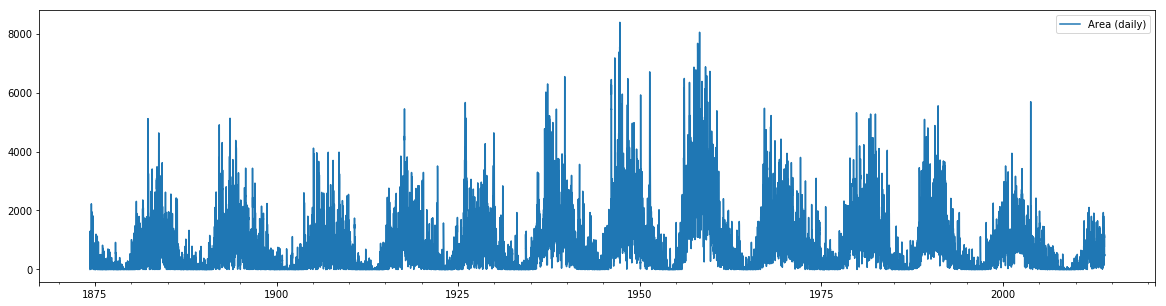

In [10]:
Daily_sunspot_area_plot()

In [11]:
def Period_area_number_plot(period):
    (dates, area) = Sunspot_area_read_and_parsing()
    (dates, area) = Sunspot_area_missed_days(dates, area)

    without_monitoring = []

    for i in range(len(area)):
        if (area[i] == -1):
            add = 1
        else:
            add = 0
        without_monitoring.append(add)

    period_area = []
    period_dates = []

    for i in range(len(area) - period + 1):
        if (sum(without_monitoring[i:i+period]) != period):
            nom_sum = sum(area[i:i+period]) + sum(without_monitoring[i:i+period])
            real_sum = math.floor(nom_sum * period / (period - sum(without_monitoring[i:i+period])))
            period_area.append(real_sum)
            period_dates.append(dates[period // 2 + i])
        else:
            print("Error: it has a period without monitoring!")
            return

    df_period = pd.DataFrame({'Area(period)': pd.Series(period_area, index=pd.DatetimeIndex(period_dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_period.plot()
    plt.show()

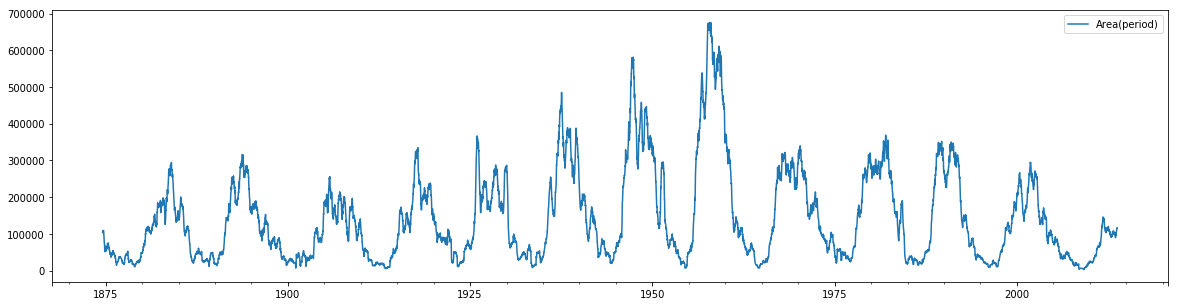

In [12]:
Period_area_number_plot(182)

In [16]:
def Sunspot_another_read_and_parsing():
    fin = open("DailySunspotData.txt", "r")

    data = fin.readlines()

    dates = []
    number = []
    
    for line in data:
        date = line[0:4] + '-' + line[4:6] + '-' + line[6:8]
        if date[5] == ' ':
            date = date[:5] + '0' + date[6:]
        if date[8] == ' ':
            date = date[:8] + '0' + date[9:]
        dates.append(date)
        number.append(line[12:24])

    diff_number = []
        
    res_dates = []
    res_sum_count = []
    res_unique_count = []

    for i in range(len(dates)):
        if (i == 0):
            res_dates.append(dates[0])
            res_sum_count.append(1)
            res_unique_count.append(1)
            diff_number.append(number[0])
        else:
            if (dates[i] == dates[i - 1]):
                res_sum_count[-1] += 1
                if not(number[i] in diff_number):
                    diff_number.append(number[i])
                    res_unique_count[-1] += 1
            else:
                res_dates.append(dates[i])
                res_sum_count.append(1)
                res_unique_count.append(0)
                if not(number[i] in diff_number):
                    diff_number.append(number[i])
                    res_unique_count[-1] += 1

    return (res_dates, res_sum_count, res_unique_count)

In [17]:
def Sunspot_another_missed_days(dates, sumc, uniquec):
    res_dates = []
    res_sum_count = []
    res_unique_count = []

    last = pd.Series(pd.date_range('1800-01-01', periods=1, freq='D'))
    tmp = pd.Series([pd.Timedelta(days=i+1) for i in range(1)])
    
    for i in range(len(dates)):
        cur = pd.Series(pd.date_range(dates[i], periods=1, freq='D'))
        
        if (i != 0):
            while (last[0] != cur[0]):
                my_date = pd.Series.to_string(last).split()
                res_dates.append(my_date[1])
                res_sum_count.append(-1)
                res_unique_count.append(-1)
                last = last + tmp
                
        res_dates.append(dates[i])
        res_sum_count.append(sumc[i])
        res_unique_count.append(uniquec[i])
                
        last = cur + tmp
                
    return (res_dates, res_sum_count, res_unique_count)

In [18]:
def Daily_sunspot_another_plot():
    (dates, sumc, uniquec) = Sunspot_another_read_and_parsing()
    (dates, sumc, uniquec) = Sunspot_another_missed_days(dates, sumc, uniquec)

    df_daily = pd.DataFrame({'Another (daily)': pd.Series(uniquec, index=pd.DatetimeIndex(dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_daily.plot()
    plt.show()

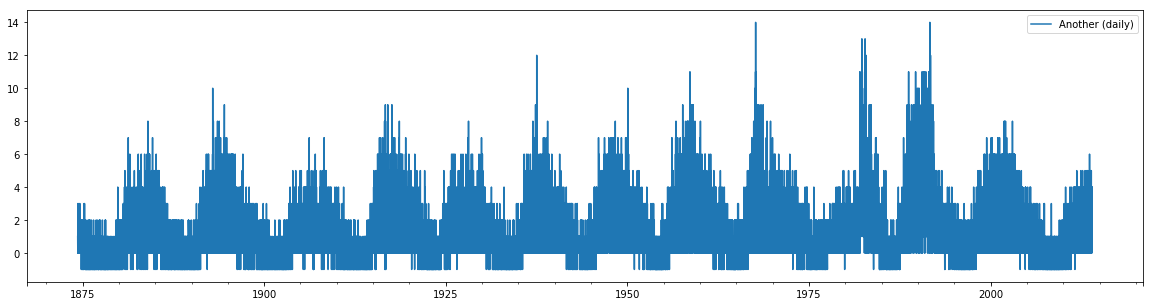

In [19]:
Daily_sunspot_another_plot()

In [20]:
def Period_another_number_plot(period):
    (dates, sumc, uniquec) = Sunspot_another_read_and_parsing()
    (dates, sumc, uniquec) = Sunspot_another_missed_days(dates, sumc, uniquec)

    without_monitoring = []

    for i in range(len(uniquec)):
        if (uniquec[i] == -1):
            add = 1
        else:
            add = 0
        without_monitoring.append(add)

    period_dates = []
    period_res = []

    for i in range(len(uniquec) - period + 1):
        if (sum(without_monitoring[i:i+period]) != period):
            real_uniquec = sum(uniquec[i:i+period]) + sum(without_monitoring[i:i+period])
            nom_sumc = sum(sumc[i:i+period]) + sum(without_monitoring[i:i+period])
            real_sumc = period * nom_sumc / (period - sum(without_monitoring[i:i+period]))
            period_res.append(real_uniquec * real_sumc)
            period_dates.append(dates[period // 2 + i])
        else:
            print("Error: it has a period without monitoring!")
            return

    df_period = pd.DataFrame({'Another (period)': pd.Series(period_res, index=pd.DatetimeIndex(period_dates))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_period.plot()
    plt.show()

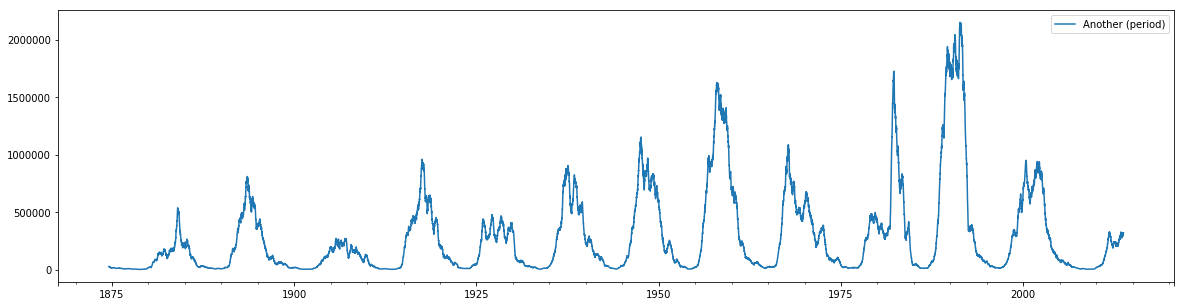

In [21]:
Period_another_number_plot(182)

In [22]:
def Period_sunspot_all_plots(period):
    (dates, count) = Sunspot_number_read_and_parsing()

    without_monitoring = []

    for i in range(len(count)):
        if (count[i] == -1):
            add = 1
        else:
            add = 0
        without_monitoring.append(add)

    period_count1 = []
    period_dates1 = []

    for i in range(len(count) - period + 1):
        if (sum(without_monitoring[i:i+period]) != period):
            nom_sum = sum(count[i:i+period]) + sum(without_monitoring[i:i+period])
            real_sum = math.floor(nom_sum * period / (period - sum(without_monitoring[i:i+period])))
            period_count1.append(real_sum)
            period_dates1.append(dates[period // 2 + i])
        else:
            print("Error: it has a period without monitoring!")
            return
        
    #
    #
    
    (dates, area) = Sunspot_area_read_and_parsing()
    (dates, area) = Sunspot_area_missed_days(dates, area)

    without_monitoring = []

    for i in range(len(area)):
        if (area[i] == -1):
            add = 1
        else:
            add = 0
        without_monitoring.append(add)

    period_area2 = []
    period_dates2 = []

    for i in range(len(area) - period + 1):
        if (sum(without_monitoring[i:i+period]) != period):
            nom_sum = sum(area[i:i+period]) + sum(without_monitoring[i:i+period])
            real_sum = math.floor(nom_sum * period / (period - sum(without_monitoring[i:i+period])))
            period_area2.append(real_sum)
            period_dates2.append(dates[period // 2 + i])
        else:
            print("Error: it has a period without monitoring!")
            return
    
    #
    #
    
    (dates, sumc, uniquec) = Sunspot_another_read_and_parsing()
    (dates, sumc, uniquec) = Sunspot_another_missed_days(dates, sumc, uniquec)

    without_monitoring = []

    for i in range(len(uniquec)):
        if (uniquec[i] == -1):
            add = 1
        else:
            add = 0
        without_monitoring.append(add)

    period_dates3 = []
    period_res3 = []

    for i in range(len(uniquec) - period + 1):
        if (sum(without_monitoring[i:i+period]) != period):
            real_uniquec = sum(uniquec[i:i+period]) + sum(without_monitoring[i:i+period])
            nom_sumc = sum(sumc[i:i+period]) + sum(without_monitoring[i:i+period])
            real_sumc = period * nom_sumc / (period - sum(without_monitoring[i:i+period]))
            period_res3.append(real_uniquec * real_sumc)
            period_dates3.append(dates[period // 2 + i])
        else:
            print("Error: it has a period without monitoring!")
            return
    

    df_period = pd.DataFrame({'Number  (period)': pd.Series(period_count1, index=pd.DatetimeIndex(period_dates1)),
                              'Area    (period)': pd.Series(period_area2, index=pd.DatetimeIndex(period_dates2)),
                              'Another (period)': pd.Series(period_res3, index=pd.DatetimeIndex(period_dates3))})

    plt.rcParams["figure.figsize"] = (20,5)
    df_period.plot()
    plt.show()

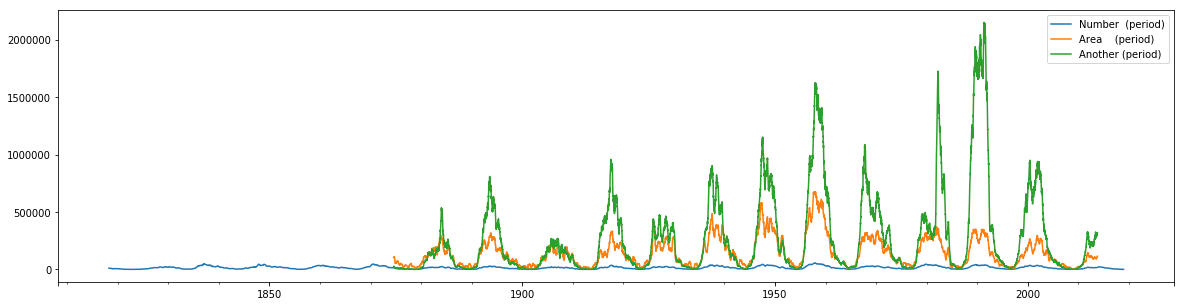

In [23]:
Period_sunspot_all_plots(182)